Image Formats in Computer Vision: JPEG, PNG, BMP

In [1]:
import cv2

# Read image (JPEG, PNG, or BMP)
img_jpg = cv2.imread("/content/irfan.jpeg")   # JPEG
img_png = cv2.imread("/content/irfan.bmp")   # PNG
img_bmp = cv2.imread("/content/irfan.png")   # BMP

print("JPEG Shape:", img_jpg.shape)
print("PNG Shape:", img_png.shape)
print("BMP Shape:", img_bmp.shape)

JPEG Shape: (1280, 960, 3)
PNG Shape: (1280, 960, 3)
BMP Shape: (1280, 960, 3)


# New Section

In [2]:
img_rgb = cv2.cvtColor(img_jpg, cv2.COLOR_BGR2RGB)

In [3]:
# Save as JPEG (adjust quality: 0-100)
cv2.imwrite("output.jpg", img_jpg, [cv2.IMWRITE_JPEG_QUALITY, 90])

# Save as PNG (adjust compression: 0-9)
cv2.imwrite("output.png", img_png, [cv2.IMWRITE_PNG_COMPRESSION, 5])

# Save as BMP (no compression)
cv2.imwrite("output.bmp", img_bmp)

True

In [9]:
from PIL import Image

img = Image.open("/content/irfan.png")

if img.mode == 'RGB':
    img = img.convert('RGBA')  # Add alpha channel if missing

# Create transparent region
data = img.getdata()
new_data = []
for y in range(img.height):
    for x in range(img.width):
        if 100 <= x < 200 and 100 <= y < 200:
            new_data.append((0, 0, 0, 0))  # Transparent
        else:
            pixel = img.getpixel((x, y))
            new_data.append(pixel)

img.putdata(new_data)
img.save("output_alpha_pillow.png")

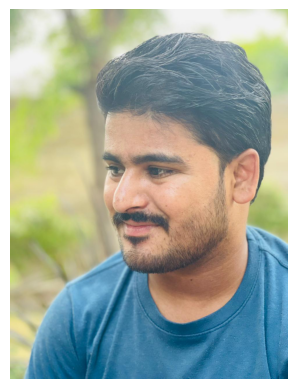

In [5]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(img_png_alpha, cv2.COLOR_BGRA2RGBA))
plt.axis('off')
plt.show()

In [6]:
from PIL import Image

# Open image (JPEG, PNG, BMP)
img_pil_jpg = Image.open("/content/irfan.jpeg")
img_pil_png = Image.open("/content/irfan.png")
img_pil_bmp = Image.open("/content/irfan.bmp")

# Save in different formats
img_pil_jpg.save("output_pillow.jpg", quality=95)  # JPEG (quality: 1-100)
img_pil_png.save("output_pillow.png", compress_level=6)  # PNG (0-9)
img_pil_bmp.save("output_pillow.bmp")  # BMP

In [7]:
# Check if PNG has transparency
print("Has alpha?", img_pil_png.mode == 'RGBA')

# Add transparency (convert to RGBA)
if img_pil_png.mode != 'RGBA':
    img_pil_png = img_pil_png.convert('RGBA')

# Modify alpha channel (make a region transparent)
data = img_pil_png.getdata()
new_data = []
for pixel in data:
    if pixel[0] > 200 and pixel[1] > 200 and pixel[2] > 200:  # White pixels
        new_data.append((255, 255, 255, 0))  # Set alpha=0 (transparent)
    else:
        new_data.append(pixel)

img_pil_png.putdata(new_data)
img_pil_png.save("output_transparent.png")

Has alpha? False


In [8]:
import os

# Get file sizes
jpg_size = os.path.getsize("output.jpg")
png_size = os.path.getsize("output.png")
bmp_size = os.path.getsize("output.bmp")

print(f"JPEG: {jpg_size / 1024:.2f} KB")
print(f"PNG: {png_size / 1024:.2f} KB")
print(f"BMP: {bmp_size / 1024:.2f} KB")

JPEG: 158.99 KB
PNG: 1168.65 KB
BMP: 3600.05 KB
